# Práctica 1: Investigación en cáncer de mama

## Objetivo de la práctica
Se dispone de un set de datos de cáncer de mama. En dicho dataset se contemplan datos sobre características de los tumores. Algunos de ellos son distintas medidas de la misma característica por lo que son muy dependientes entre sí y generan ruido. A partir de esta información, un equipo de investigación de oncología quiere crear un Decision Support System para entender mejor cuales son las características que mas influyen en el diagnóstico.

Para ello usaremos el dataset “cancer.csv”. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.


## 1) Preprocesamiento


### Se importan las librerías necesarias para la realización de la práctica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

### Se importa el archivo de datos.

In [ ]:
data = pd.read_csv('cancer.csv')

print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Se eliminan elementos repetidos y se estudia la presencia de elementos vacíos en el conjunto. Siendo la columna `Unnamed: 32` la única variable con elementos vacíos, se elimina.

In [ ]:
data = data.drop_duplicates()

data = data.drop(columns = ['Unnamed: 32'])

print('na: ', data.isna().sum().sum())

na:  0


### Se estudia la correlación entre las variables.


<Axes: >

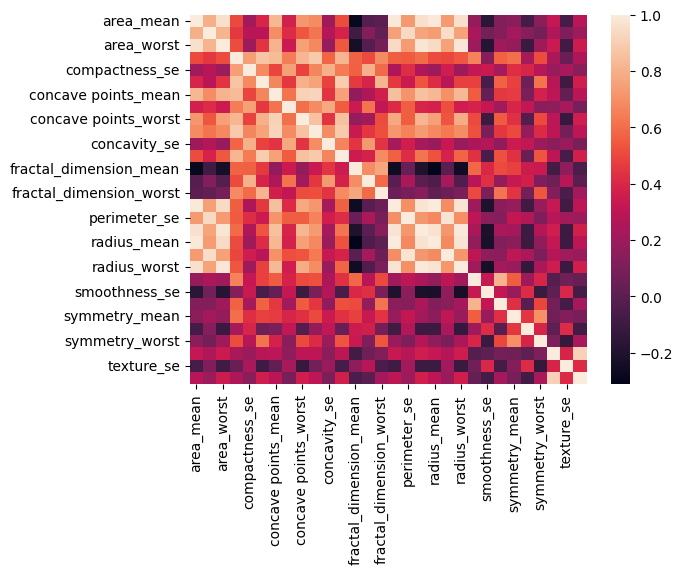

In [ ]:
columns = ['area_mean', 'area_se', 'area_worst',
           'compactness_mean', 'compactness_se', 'compactness_worst',
           'concave points_mean', 'concave points_se', 'concave points_worst',
           'concavity_mean', 'concavity_se', 'concavity_worst',
           'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst',
           'perimeter_mean', 'perimeter_se', 'perimeter_worst',
           'radius_mean', 'radius_se', 'radius_worst',
           'smoothness_mean', 'smoothness_se', 'smoothness_worst',
           'symmetry_mean', 'symmetry_se', 'symmetry_worst',
           'texture_mean', 'texture_se', 'texture_worst']

corr = data[columns].corr()
sns.heatmap(corr)

Se estudia la correlación entre las características de cada variable  (`mean`, `se` y `worst`).

In [ ]:
for i in range(1, len(columns)+1):
  if i%3 == 0:
    col = columns[i-3:i]
    print(data[col].corr())

            area_mean   area_se  area_worst
area_mean    1.000000  0.800086    0.959213
area_se      0.800086  1.000000    0.811408
area_worst   0.959213  0.811408    1.000000
                   compactness_mean  compactness_se  compactness_worst
compactness_mean           1.000000        0.738722           0.865809
compactness_se             0.738722        1.000000           0.678780
compactness_worst          0.865809        0.678780           1.000000
                      concave points_mean  concave points_se  \
concave points_mean              1.000000           0.615634   
concave points_se                0.615634           1.000000   
concave points_worst             0.910155           0.602450   

                      concave points_worst  
concave points_mean               0.910155  
concave points_se                 0.602450  
concave points_worst              1.000000  
                 concavity_mean  concavity_se  concavity_worst
concavity_mean         1.000000      0.6

Características `area`:
Se pueden eliminar las variables `area_se` y `area_worst` ya que tienen una correlación mayor al 80% con respecto a la variable `area_mean`.

Características `compactness`:
Se pueden eliminar las variables `compactness_se` y `compactness_worst` ya que tienen una correlación mayor al 70% con respecto a la variable `compactness_mean`.

Características `concave points`:
Se pueden eliminar las variables `concave points_se` y `concave points_worst` ya que tienen una correlación mayor al 60% con respecto a la variable `concave points_mean`.


Características `concavity`:
Se pueden eliminar las variables `concavity_se` y `concavity_worst` ya que tienen una correlación mayor al 65% con respecto a la variable `concavity_mean`.

Características `fractal_dimension`:
Se pueden eliminar las variables `fractal_dimension_se` y `fractal_dimension_worst` ya que tienen una correlación mayor al 65% con respecto a la variable `fractal_dimension_mean`.

Características `perimeter`:
Se pueden eliminar las variables `perimeter_se` y `perimeter_worst` ya que tienen una correlación mayor al 65% con respecto a la variable `perimeter_mean`.

Características `radius`:
Se pueden eliminar las variables `radius_se` y `radius_worst` ya que tienen una correlación mayor al 65% con respecto a la variable `radius_mean`.

Características `smoothness`:
Se puede eliminar la variable `smoothness_worst` ya que tiene una correlación mayor al 80% con respecto a la variable `smoothness_mean`. Sin embargo, como la variable `smoothness_se` presenta un porcentaje de correlación menor al 30% no se debe eliminar.

Características `symmetry`:
Se puede eliminar la variable `symmetry_worst` ya que tienen una correlación mayor al 65% con respecto a la variable `symmetry_mean`. La variable `symmetry_se` presenta una correlación al 45% y por tanto se mantiene.

Características `texture`:
Se puede eliminar la variable `texture_worst` ya que tienen una correlación mayor al 65% con respecto a la variable `texture_mean`. Como la variable `texture_se` presenta una correlación al 40% se mantiene.

In [ ]:
data = data.drop(columns = ['area_se', 'area_worst', 'compactness_se', 'compactness_worst',
                            'concave points_se', 'concave points_worst', 'concavity_se',
                            'concavity_worst', 'fractal_dimension_se', 'fractal_dimension_worst',
                            'perimeter_se', 'perimeter_worst', 'radius_se', 'radius_worst',
                            'smoothness_worst', 'symmetry_worst', 'texture_worst'])


print(data.shape)
data.head()

(569, 15)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,0.006399,0.03003
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,0.005225,0.01389
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,0.006150,0.02250
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,0.009110,0.05963
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,0.011490,0.01756


Estudiando la correlación entre todas las variables se pude observar que la variable `radius_mean` tiene una correlación mayor al 95% con respecto a `perimeter_mean`. La variable `concave points_mean`, `smoothness_mean` y `symmetry_mean` presentan una correlación mayor al 60% frente a `compactness_mean`. Por otro lado, la variable `concavity_mean` con respecto a `concavity_mean`.

In [ ]:
data = data.drop(columns = ['radius_mean', 'concave points_mean', 'concavity_mean',
                            'smoothness_mean', 'symmetry_mean'])

<Axes: >

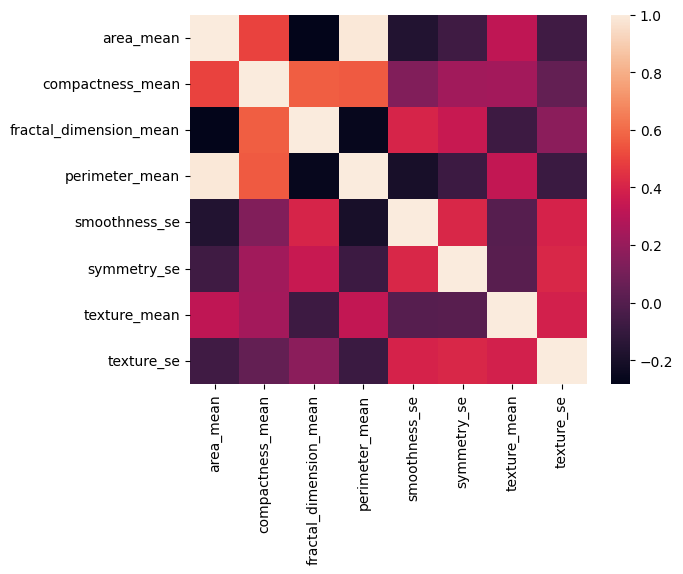

In [ ]:
columns = ['area_mean', 'compactness_mean', 'fractal_dimension_mean',
           'perimeter_mean', 'smoothness_se', 'symmetry_se', 'texture_mean', 'texture_se']

corr = data[columns].corr()
sns.heatmap(corr)

### Transformación de datos a categóricos.

Se categorizan los valores de las variables relacionadas con el área (`area_mean`), diámetro (`perimeter_mean`) y compacidad (`compactness_mean`) en tres categorías. Estas categorías se dividen en:
- `bajo` : si el valor está por debajo del valor que marca el primer cuartil de los datos
- `medio`: si el valor se encuentra entre los valores que indican el primer y segundo cuartil
- `alto`: si el valor es mayor al valor que señala el tercer cuartil

In [ ]:
def categorizar(value):
  if value <= min:
    return 'bajo'
  elif value >= min+1 and value <= max:
    return 'medio'
  else:
    return 'alto'

for col in ['area_mean', 'perimeter_mean', 'compactness_mean']:
  d = data[col].describe()
  min, max = d[4], d[7]

  data[col] = data[col].apply(categorizar)

print(data.shape)
data.head()

(569, 10)


,id,diagnosis,texture_mean,perimeter_mean,area_mean,compactness_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,842302,M,10.38,medio,medio,alto,0.07871,0.9053,0.006399,0.03003
1,842517,M,17.77,medio,medio,alto,0.05667,0.7339,0.005225,0.01389
2,84300903,M,21.25,medio,medio,alto,0.05999,0.7869,0.006150,0.02250
3,84348301,M,20.38,medio,bajo,alto,0.09744,1.1560,0.009110,0.05963
4,84358402,M,14.34,medio,medio,alto,0.05883,0.7813,0.011490,0.01756


## 2) Clasificadores

### Se dividen los datos en conjuntos.

Se codifican las variables categóricas.

In [ ]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
data['area_mean'] = label_encoder.fit_transform(data['area_mean'])
data['compactness_mean'] = label_encoder.fit_transform(data['compactness_mean'])
data['perimeter_mean'] = label_encoder.fit_transform(data['perimeter_mean'])

print(data.shape)
data.head()

(569, 10)


,id,diagnosis,texture_mean,perimeter_mean,area_mean,compactness_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,842302,1,10.38,2,2,0,0.07871,0.9053,0.006399,0.03003
1,842517,1,17.77,2,2,0,0.05667,0.7339,0.005225,0.01389
2,84300903,1,21.25,2,2,0,0.05999,0.7869,0.006150,0.02250
3,84348301,1,20.38,2,1,0,0.09744,1.1560,0.009110,0.05963
4,84358402,1,14.34,2,2,0,0.05883,0.7813,0.011490,0.01756


Se dividen los datos en características (variable `y`) y etiquetas (variable `diagnosis`). Después, se dividen en un conjunto de entrenamiento y otro conjunto de test.

In [ ]:
X = data.drop(columns = ['diagnosis'])
y = data[['diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 40)

print('Entrenamiento: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Entrenamiento:  (455, 9) (455, 1)
Test:  (114, 9) (114, 1)


### Se definen los clasificadores.

Se crean dos árboles de decisión, uno con criterio de clasificación GINI y otro con criterio de entropía. Ambos modelos se entrenan con los datos de entrenamiento y se calcula la precisión de cada uno.

#### Clasificador 1: GINI

In [ ]:
gini = DecisionTreeClassifier(criterion = 'gini')
gini.fit(X_train, y_train)

y_pred = gini.predict(X_test)
error = 1 - accuracy_score(y_test, y_pred)

print('Error: ', error)

Error:  0.22807017543859653


#### Clasificador 2: entropía

In [ ]:
entr = DecisionTreeClassifier(criterion = 'entropy')
entr.fit(X_train, y_train)

y_pred = entr.predict(X_test)
error = 1 - accuracy_score(y_test, y_pred)

print('Error: ', error)

Error:  0.2192982456140351


## 3) Representación del mejor modelo


El modelo con menor error es el clasificador que emplea el criterio de entropía.

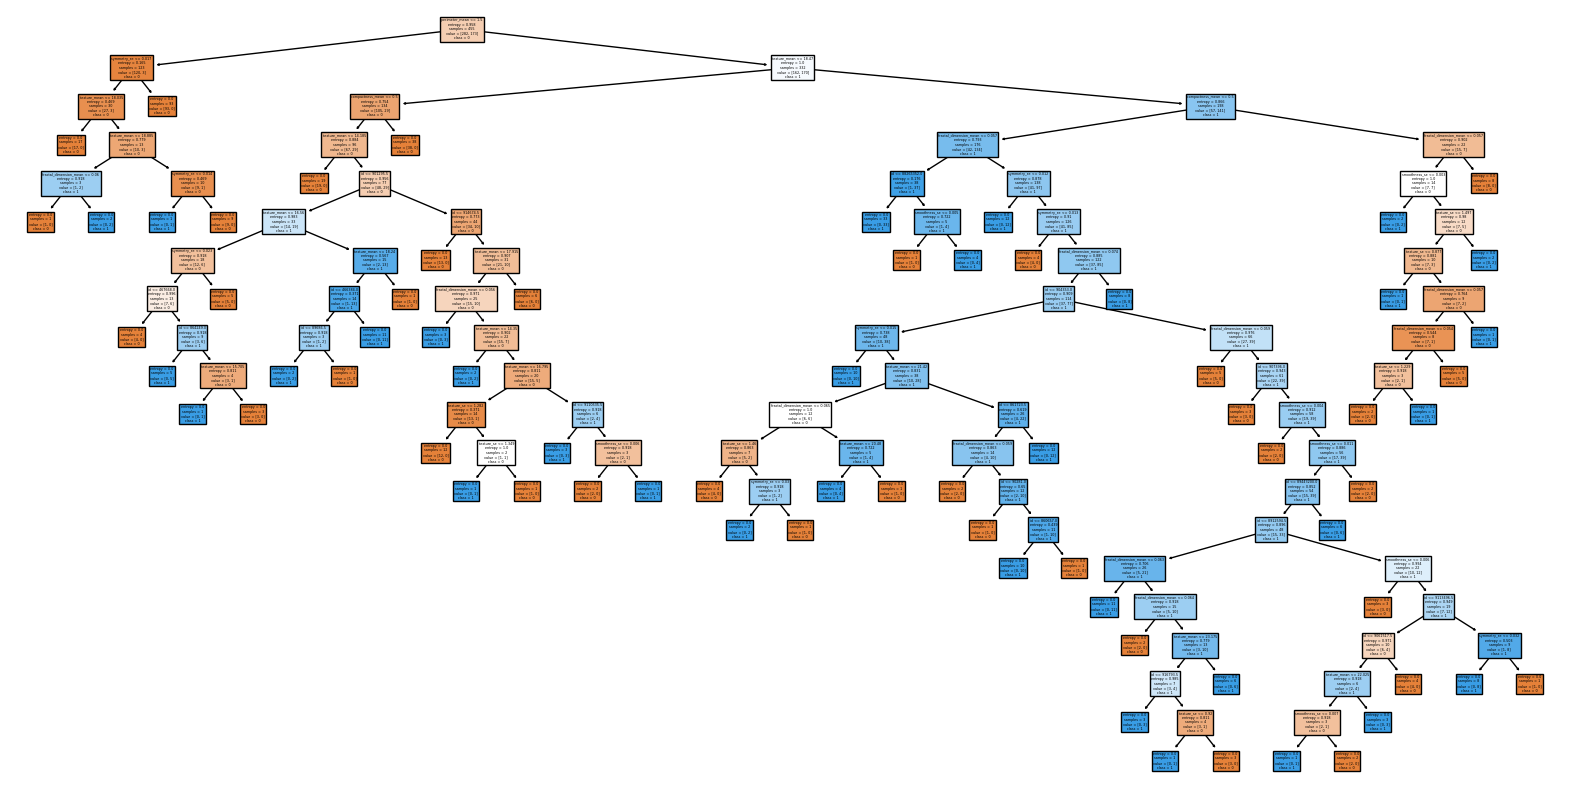

In [ ]:
plt.figure(figsize = (20,10))

plot_tree(entr, feature_names = X_train.columns,
          class_names = [str(cls) for cls in entr.classes_],
          filled=True)
plt.show()

## 4) Selección de reglas

Se estudian las reglas generadas por el árbol.

In [ ]:
reglas = export_text(entr, feature_names = list(X.columns))
print(reglas)

|--- perimeter_mean <= 1.50
|   |--- symmetry_se <= 0.02
|   |   |--- texture_mean <= 18.03
|   |   |   |--- class: 0
|   |   |--- texture_mean >  18.03
|   |   |   |--- texture_mean <= 18.89
|   |   |   |   |--- fractal_dimension_mean <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fractal_dimension_mean >  0.06
|   |   |   |   |   |--- class: 1
|   |   |   |--- texture_mean >  18.89
|   |   |   |   |--- symmetry_se <= 0.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- symmetry_se >  0.01
|   |   |   |   |   |--- class: 0
|   |--- symmetry_se >  0.02
|   |   |--- class: 0
|--- perimeter_mean >  1.50
|   |--- texture_mean <= 18.47
|   |   |--- compactness_mean <= 0.50
|   |   |   |--- texture_mean <= 14.18
|   |   |   |   |--- class: 0
|   |   |   |--- texture_mean >  14.18
|   |   |   |   |--- id <= 901295.50
|   |   |   |   |   |--- texture_mean <= 16.56
|   |   |   |   |   |   |--- symmetry_se <= 0.02
|   |   |   |   |   |   |   |--- id <= 467668.00
|   |   |

Las reglas que menos generalizan son aquellas más cercanas a la raíz del árbol, es decir, las reglas que abarcan un menor número de condiciones. En este caso dos reglas que cumplen esto son:

1) Si `perimeter_mean <= 1.50` & `symmetry_se >  0.02` entonces `class: 0`

2) Si `perimeter_mean <= 1.50` & `symmetry_se <= 0.02` & `texture_mean <= 18.03` entonces `class: 0`

Esto significa que para aquellos registros con `perimeter_mean <= 1.50` y `symmetry_se >  0.02` o `symmetry_se <= 0.02` y `texture_mean <= 18.03` el diagnóstico de cancer será negativo.

Para las reglas que menos especializan, es decir, todas las reglas con una profundidad alta que están más lejos de la raíz y, por tanto, presentan varias condiciones. Dos reglas que siguen este patrón son:

1) Si `perimeter_mean >  1.50` & `texture_mean <= 18.47` & `compactness_mean <= 0.50` & `texture_mean >  14.18` & `id >  901295.50` & `id >  914674.50` & `texture_mean <= 17.91` & `fractal_dimension_mean >  0.06` & `texture_mean >  14.35` & `texture_mean <= 16.80` & `texture_se <= 1.28` entonces `class: 0`

2) Si `perimeter_mean >  1.50` & `texture_mean <= 18.47` & `compactness_mean <= 0.50` & `texture_mean >  14.18` & `id >  901295.50` & `id >  914674.50` & `texture_mean <= 17.91` & `fractal_dimension_mean >  0.06` & `texture_mean >  14.35` & `texture_mean >  16.80` & `smoothness_se >  0.01` entonces `class: 1`

Esto implica que para los registros que cumplan las condiciones de la primera regla el diagnóstico será negativo, si por el contrario siguen los criterios de la segunda regla entonces el diagnóstico será positivo.

## 5) Nuevos individuos

Se establecen valores para los nuevos 5 individuos a clasificar. Para cada columna se genera un valor dentro del rango de los datos anteriores para evitar valores fuera de rango.

In [ ]:
np.random.seed(48)
X_new = pd.DataFrame(columns = X.columns)
y_new = pd.DataFrame(columns = y.columns)

for i in range(5):
  for col in X.columns:
    m = data[col].describe()
    min, max = m[4], m[7]+1

    if col in ['area_mean', 'perimeter_mean', 'compactness_mean']:
      X_new.loc[i, col] = np.random.randint(min, max)

    else:
      X_new.loc[i, col] = np.random.uniform(min, max)

X_new.head()

,id,texture_mean,perimeter_mean,area_mean,compactness_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,16793257.644266,37.665831,2,1,0,0.170212,5.699784,0.411789,0.52532
1,681018030.364502,27.066814,2,1,1,0.205236,3.081433,0.756152,0.504611
2,540534126.828193,24.288171,1,1,1,0.59318,3.118995,0.688158,0.188164
3,335061888.164576,23.365257,1,2,0,0.669886,3.7382,0.348543,0.420009
4,366543502.073485,32.548522,1,2,1,0.746249,2.711036,0.456783,0.049722


Se clasifican estos nuevos datos.

In [ ]:
y_pred = entr.predict(X_new)

print('Diagnosis: ', y_pred)

Diagnosis:  [1 0 0 0 0]


Estos resultados indican que únicamente el primer individuo presentará un diagnóstico de cancer positivo, al contrario que los otros individuos.